In [2]:
# Eng/Amr Mostafa Omar
# Nile University ,Cairo, Egypt
# Data 1/4/2024

In [3]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 3.3 MB/s eta 0:00:00


In [5]:
# Import  libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import RobustScaler
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint
from skopt import BayesSearchCV


# Mount Google Drive to access files
from google.colab import drive

In [6]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##**The methodology used in the data mining project involves several steps:**

**1-Problem Definition:** The project starts with defining the problem statement and goals, which in this case involves analyzing a dataset to predict product ratings.

**2-Data Loading:** The training and testing data are loaded into the environment using Pandas from Google Drive, as the project is being conducted in Google Colab.

**3-Data Exploration and Preprocessing:**

The data is explored to gain insights into its structure, including checking for missing values, understanding data types, and performing descriptive statistics.
Necessary data preprocessing steps are performed, such as converting data types, handling missing values using imputation techniques (SimpleImputer), encoding categorical variables using One-Hot Encoding (get_dummies), and normalizing the data using MinMaxScaler.

**4-Feature Selection:**

Irrelevant columns are dropped based on domain knowledge and analysis to focus on relevant features for model training.
Numerical features are selected for further analysis and modeling.

**5-Model Training and Evaluation:**

Machine learning models such as Decision Tree Classifier, Logistic regression (LR), and XGBoost Classifier are trained on the preprocessed data.
Model performance metrics  will be AUROC as a metric on the predicted probability

**6-Hyperparameter Tuning:**

Grid search ,Random search and bayesen search  are used to tune the hyperparameters of the  Classifiers  better performance.

**7-Model Prediction:**

The trained models are used to make predictions on the test dataset to generate ratings for products.
Saving Prediction Files:

Finally, the predictions are saved into CSV files for further analysis or submission.

##**1-Problem Definition:**

* **Input:** Information about a speed dating session, including profiles of two people.
* **Output:** Probability (0-1) that the dating session will lead to a successful match.
* **Data Mining Function:** Binary classification.
* **Challenges:** Dealing with missing values, handling class imbalance, selecting relevant features, choosing an appropriate classification algorithm, and tuning hyperparameters.
* **Impact:** The model will help improve the matching of people in speed dating events, potentially leading to more successful matches and enhancing the overall experience for participants.
* **Ideal Solution:** An accurate and robust binary classification model that predicts the probability of a successful match based on the provided profile information.

##**2-Data Loading:**

In [7]:
data = pd.read_csv('/content/gdrive/MyDrive/train_c2.csv')

In [8]:
data.shape

(5909, 192)

##**3-Data Exploration :**

###**Check dataset and included null values**

In [9]:
data.head(5)

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 192 entries, gender to id
dtypes: float64(173), int64(11), object(8)
memory usage: 8.7+ MB


In [11]:
data.describe()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
count,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,4591.000000,5909.00000,5909.000000,5901.000000,...,2804.000000,2804.000000,2804.000000,2804.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,5909.000000
mean,0.505331,17.360298,1.824843,11.347436,16.850228,9.001523,9.254846,8.91166,8.962938,283.733266,...,8.105563,8.377318,7.644437,7.398716,6.799717,7.631989,7.944798,7.162774,7.092711,4191.314943
std,0.500014,10.947542,0.380133,6.011495,4.389246,5.482368,5.611803,5.45710,5.500706,158.993002,...,1.601011,1.459013,1.757559,1.956924,1.535768,1.498024,1.320919,1.687431,1.713729,2408.009173
min,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000,0.000000
25%,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.00000,4.000000,153.000000,...,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,2124.000000
50%,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.00000,8.000000,280.000000,...,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000,4210.000000
75%,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.00000,13.000000,409.000000,...,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000,6266.000000
max,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.00000,22.000000,552.000000,...,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8372.000000


In [12]:
data.columns

Index(['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1',
       'order', 'partner', 'pid',
       ...
       'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3', 'sinc5_3',
       'intel5_3', 'fun5_3', 'amb5_3', 'id'],
      dtype='object', length=192)


### **Counting  numbers of null values in each column filter data from feaures with high missing values.**


In [13]:
# Checking for missing values
print(data.isnull().sum().sort_values(ascending=False))

num_in_3    5449
numdat_3    4849
expnum      4627
amb7_2      4519
sinc7_2     4519
            ... 
position       0
round          0
wave           0
condtn         0
id             0
Length: 192, dtype: int64


In [14]:
# Calculate the percentage of missing values for each column
missing_percentages = data.isnull().mean() * 100

# Get the columns where missing values are greater than or equal to 70%
columns_to_drop = missing_percentages[missing_percentages >= 70].index

# Drop the columns with high missing value percentages
data = data.drop(columns=columns_to_drop)

In [15]:
data.shape

(5909, 171)

In [16]:
# Convert non-numeric values to NaN in 'income' and 'tuition' columns as they are considered as categorical features
data[['income', 'tuition']] = data[['income', 'tuition']].apply(pd.to_numeric, errors='coerce')

# Convert NaN to a default value (0)
data['income'].fillna(0, inplace=True)
data['tuition'].fillna(0, inplace=True)

# Convert the 'income' and 'tuition' columns to integer type
data['income'] = data['income'].astype('int')
data['tuition'] = data['tuition'].astype('int')

### **Determin number of categorical and numerical features in dataset**

In [17]:
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = data.select_dtypes(exclude=[np.number]).columns.tolist()
print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Numerical features: ['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'tuition', 'race', 'imprace', 'imprelig', 'income', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'matc

In [18]:
num_numerical_features = len(numerical_features)
num_categorical_features = len(categorical_features)

print("Number of numerical features:", num_numerical_features)
print("Number of categorical features:", num_categorical_features)

Number of numerical features: 165
Number of categorical features: 6


###**Visualization and plots to get insights**

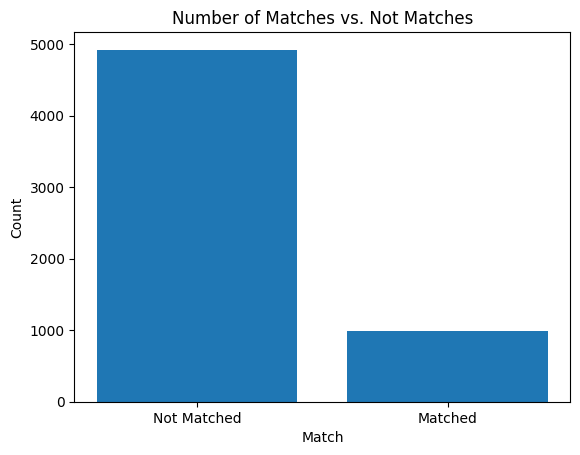

In [21]:
# Count the number of matches and non-matches
match_counts = data['match'].value_counts()

# Plot the bar plot
plt.bar(match_counts.index, match_counts.values)
plt.xlabel('Match')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Matched', 'Matched'])
plt.title('Number of Matches vs. Not Matches')
plt.show()

The bar graph shows the distribution of matches and non-matches in the dataset. It indicates that there are significantly more instances of "Not Matched" compared to "Matched". This suggests that there may be class imbalance in the dataset, with a larger number of observations where matches did not occur.

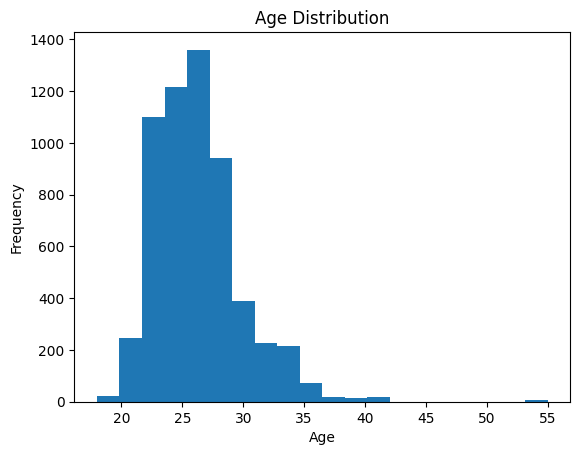

In [22]:
# Plot a histogram of age distribution
plt.hist(data['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


The histogram illustrates the distribution of ages in the dataset. It shows that the majority of individuals fall within the range of approximately 20 to 45 years old, with a peak around the mid-20s to mid-30s. There is a gradual decrease in frequency as age increases beyond 45 years old. Overall, the distribution appears to be skewed to the right, indicating that younger individuals are more prevalent in the dataset.

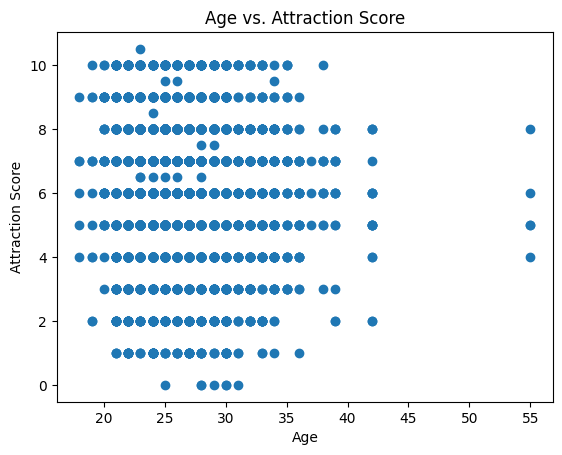

In [23]:
# Create a scatter plot of age vs. attraction score
plt.scatter(data['age'], data['attr_o'])
plt.xlabel('Age')
plt.ylabel('Attraction Score')
plt.title('Age vs. Attraction Score')
plt.show()


The scatter plot visualizes the relationship between age and attraction score. Each dot represents an individual's age and their corresponding attraction score. There doesn't seem to be a clear pattern or trend between age and attraction score, indicating that these two variables may not have a strong linear relationship. However, there appears to be a relatively even distribution of attraction scores across different age groups.

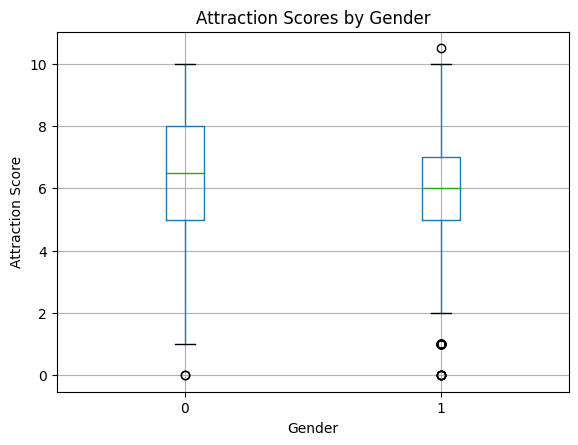

In [24]:
# Create a box plot of attraction scores by gender
data.boxplot(column='attr_o', by='gender')
plt.xlabel('Gender')
plt.ylabel('Attraction Score')
plt.title('Attraction Scores by Gender')
plt.suptitle('')
plt.show()

The box plot illustrates the distribution of attraction scores separated by gender and  it seems that there's no significant difference in attraction scores between genders, as the medians and IQRs are relatively similar for both groups.

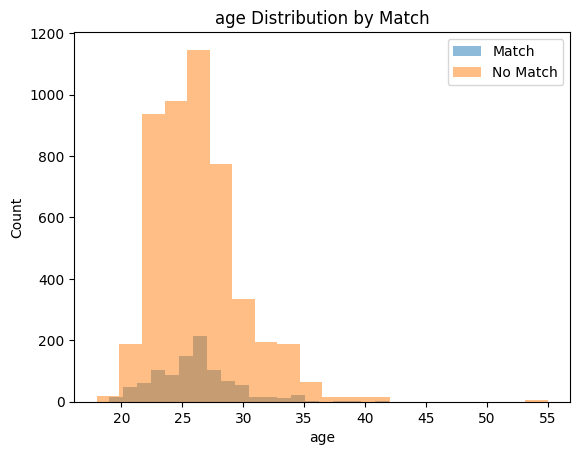

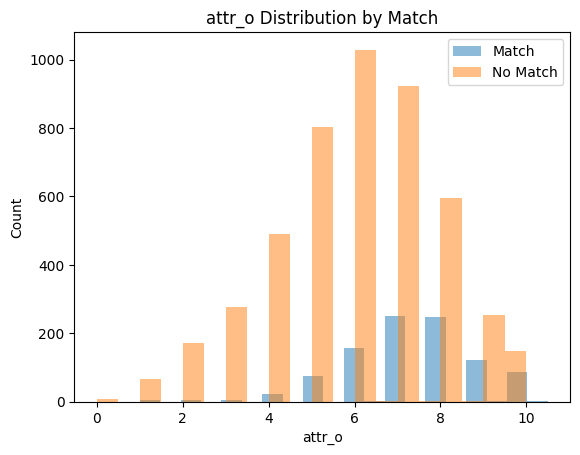

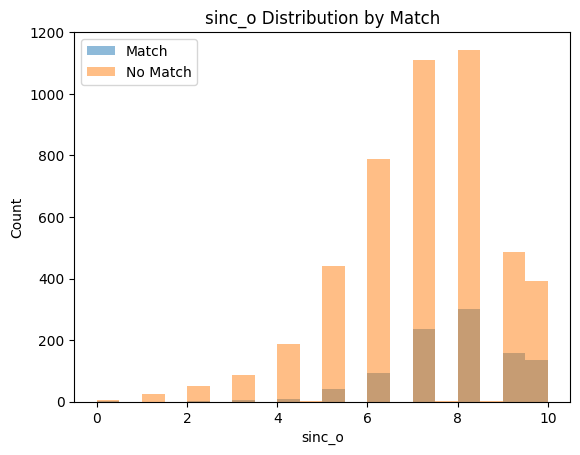

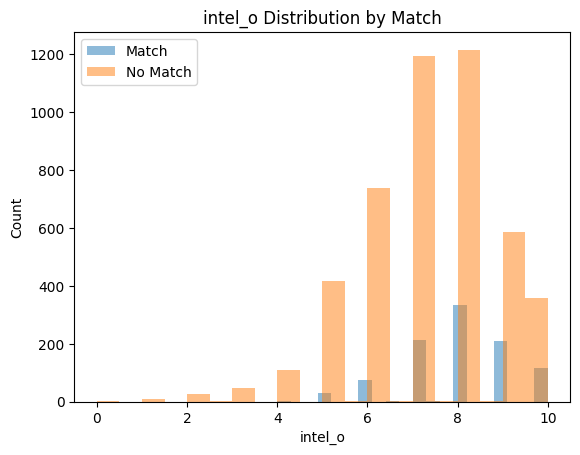

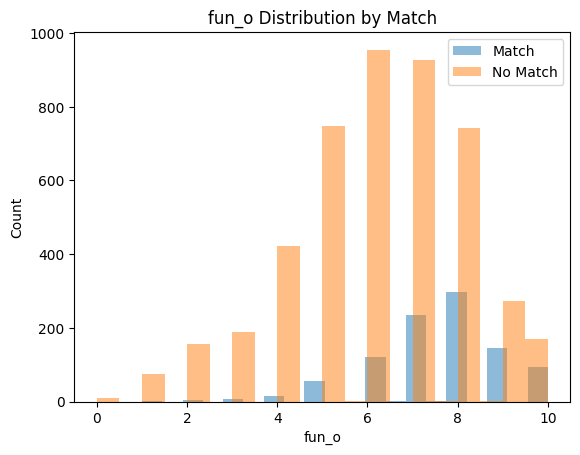

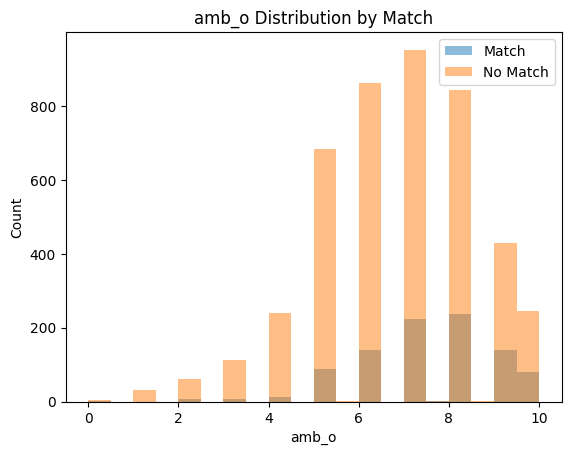

In [25]:
selected_features = ['age', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o']
for feature in selected_features:
    plt.hist(data[data['match'] == 1][feature], bins=20, alpha=0.5, label='Match')
    plt.hist(data[data['match'] == 0][feature], bins=20, alpha=0.5, label='No Match')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'{feature} Distribution by Match')
    plt.legend()
    plt.show()

*  Fig 1 illustrates that the age distribution for individuals who had matches (blue) is similar to those who did not (orange), with a peak around the mid to late 20s and a gradual decline thereafter.

* Fig 2 illustrates that the age distribution is skewed towards younger ages, with a peak around the mid to late 20s, for individuals who had matches (blue) compared to those who did not (orange).

* Fig 3 shows the scatter plot of age versus attraction score, indicating a diverse range of attraction scores across different age groups. There doesn't appear to be a clear correlation between age and attraction score from this visualization.

* Fig 4 demonstrates that the distribution of attraction scores is relatively consistent across different age groups, with no apparent trend indicating that attraction scores vary significantly based on age.

* Fig 5 indicates that there's no substantial difference in the age distribution between individuals who had matches (blue) and those who did not (orange), with both groups having a similar peak around the mid to late 20s and a gradual decline thereafter.

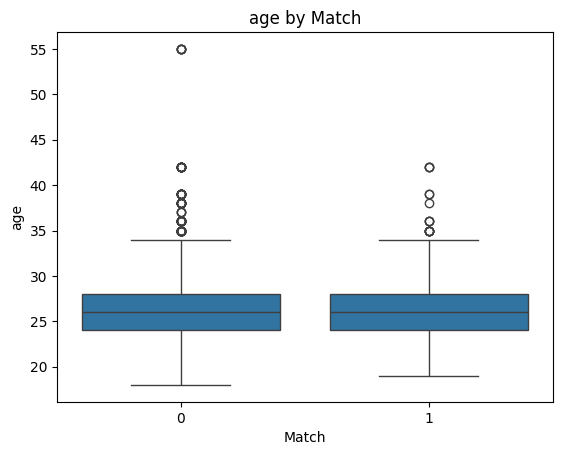

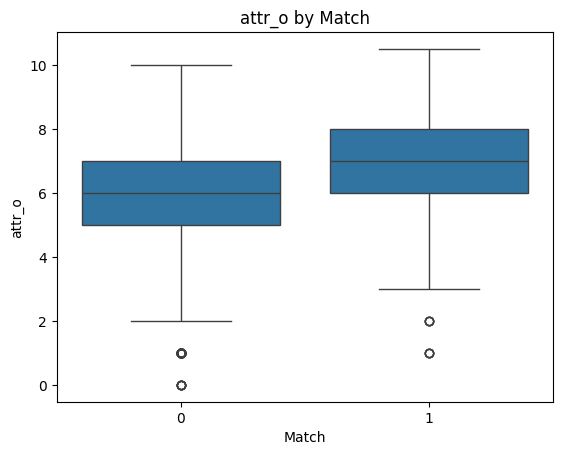

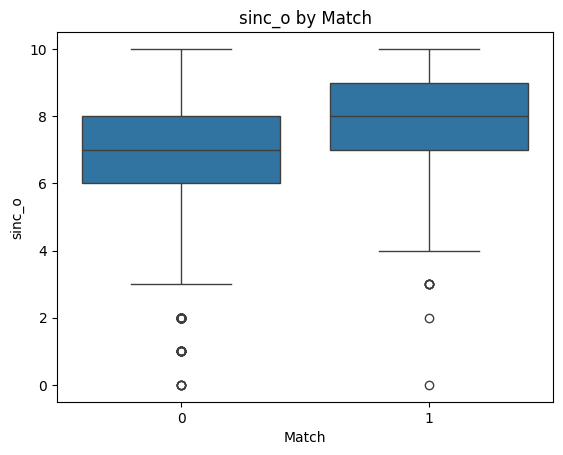

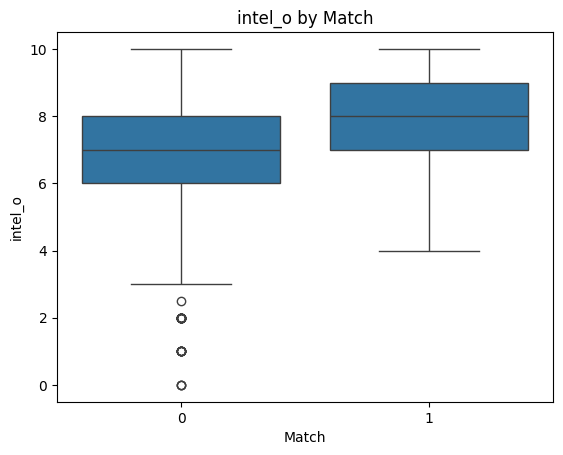

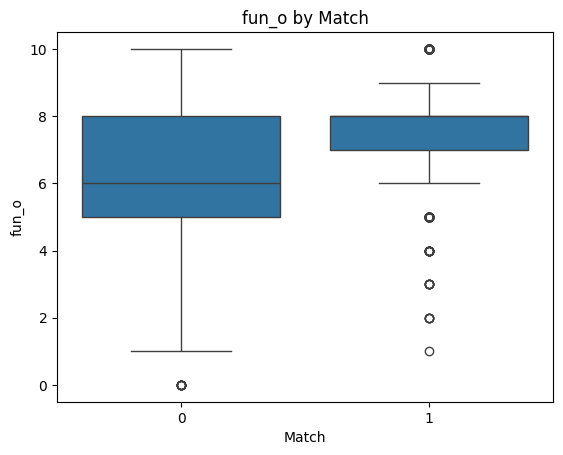

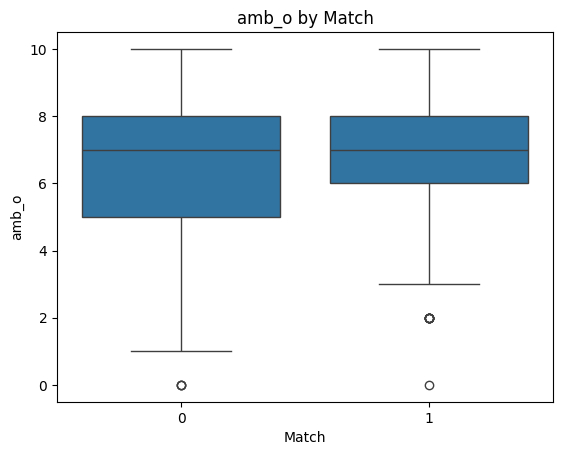

In [26]:
selected_features = ['age', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o']
target = data['match']

for feature in selected_features:
    sns.boxplot(x=target, y=feature, data=data)
    plt.xlabel('Match')
    plt.ylabel(feature)
    plt.title(f'{feature} by Match')
    plt.show()

* Fig 1 depicts the distribution of ages among individuals based on whether they had a match or not. It indicates that individuals who had matches (Match = 1) tend to have a slightly higher median age compared to those who did not have matches (Match = 0).

* Fig 2 illustrates the distribution of attractiveness ratings (attr_o) among individuals based on whether they had a match or not. It shows that individuals who had matches tend to have higher attractiveness ratings compared to those who did not have matches.

* Fig 3 displays the distribution of sincerity ratings (sinc_o) among individuals based on whether they had a match or not. It suggests that there is not a significant difference in sincerity ratings between individuals who had matches and those who did not.

* Fig 4 shows the distribution of intelligence ratings (intel_o) among individuals based on whether they had a match or not. Similar to attractiveness ratings, individuals who had matches tend to have higher intelligence ratings compared to those who did not have matches.

* Fig 5 presents the distribution of fun ratings (fun_o) among individuals based on whether they had a match or not. It indicates that individuals who had matches tend to have higher fun ratings compared to those who did not have matches.

* Fig 6 illustrates the distribution of ambition ratings (amb_o) among individuals based on whether they had a match or not. Similar to sincerity ratings, there is not a significant difference in ambition ratings between individuals who had matches and those who did not.

**Overall,** attractiveness, intelligence, and fun appear to **be key factors influencing** the likelihood of having a match, while age, sincerity, and ambition may have less of an impact.

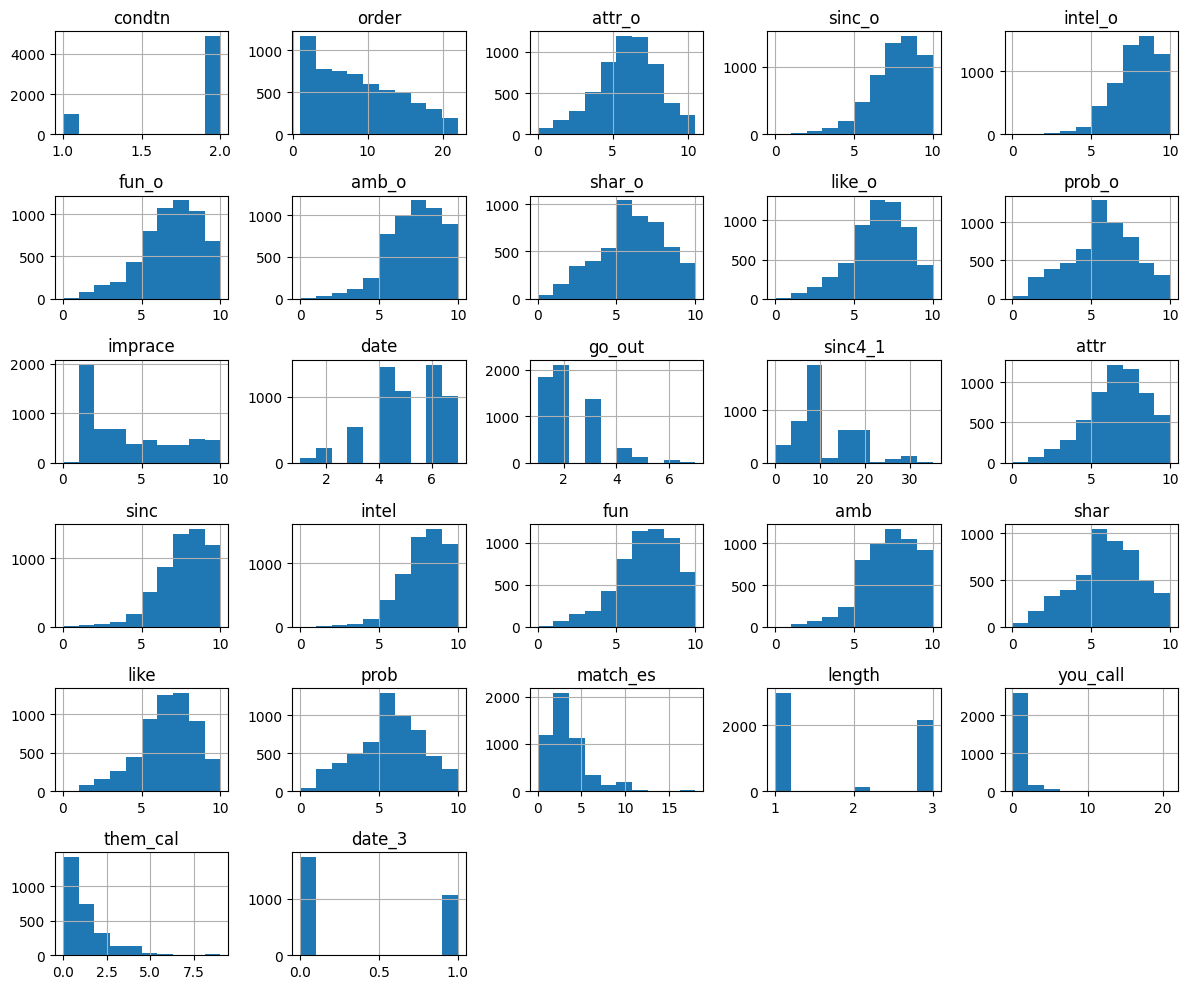

In [27]:
# We select some features and make some visualization in a trial to get some insights
features = ['condtn', 'order', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o',
       'shar_o', 'like_o', 'prob_o', 'imprace', 'date', 'go_out', 'sinc4_1',
       'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'match_es', 'length', 'you_call', 'them_cal', 'date_3']

# Plotting histograms for all selected numerical features
data_selected = data[features]
data_selected.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


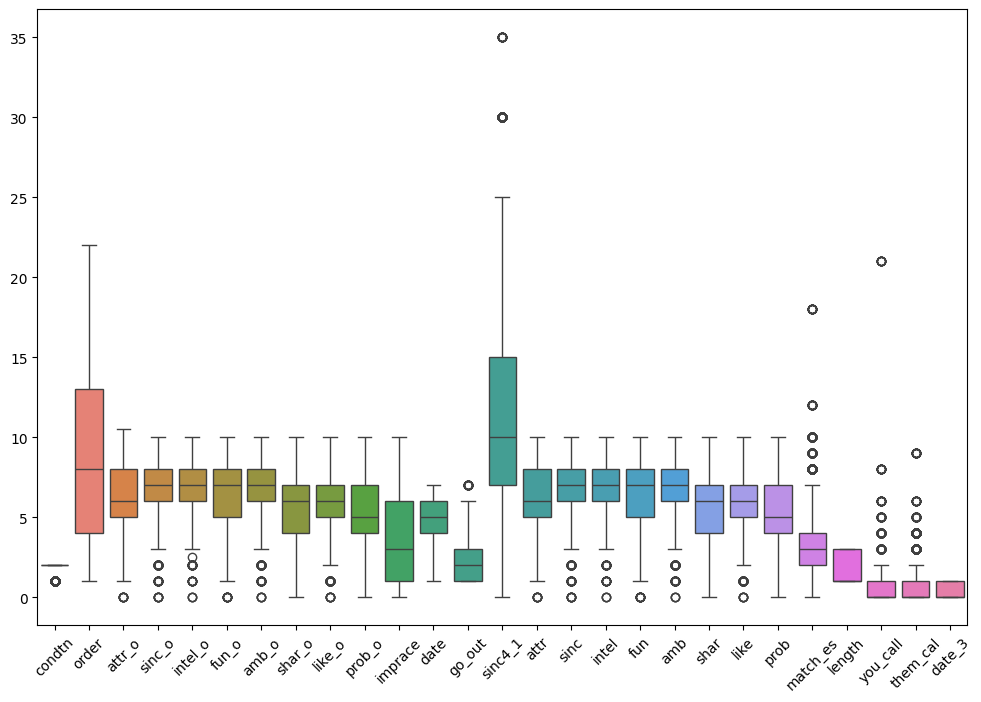

In [28]:
# Boxplot for all selected features
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_selected)
plt.xticks(rotation=45)
plt.show()

This boxplot visualizes the distribution of different attributes/features related to dating or social interactions. Each box represents the distribution of a specific attribute, such as attractiveness, sincerity, intelligence, etc. The spread and variability of these attributes can provide insights into various factors influencing dating preferences and outcomes. Outliers, shown as individual points outside the whiskers, indicate extreme values that may be noteworthy in understanding the dataset's characteristics and patterns.

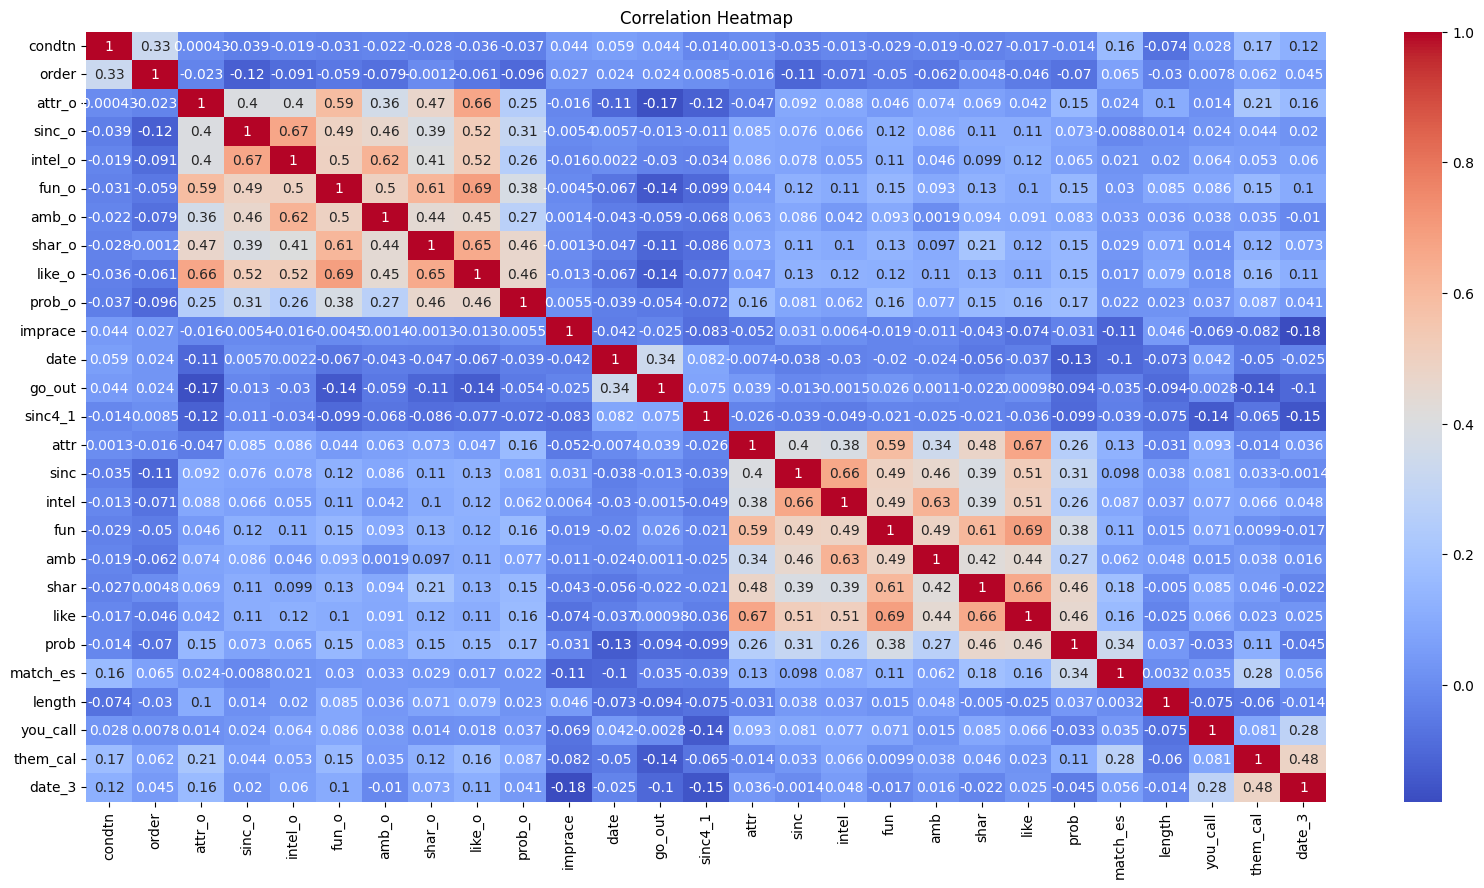

In [29]:
# Correlation heatmap for all selected features
plt.figure(figsize=(20, 10))
sns.heatmap(data_selected.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

###**4-Feature Selection:**

* **Order**: Represents the sequence or order of events, which could be useful for analyzing patterns or trends based on when interactions occurred.

* **Attr_o, Sinc_o, Intel_o, Fun_o, Amb_o, Shar_o, Like_o, Prob_o:** These columns likely capture ratings or perceptions from partners about attributes such as attractiveness, sincerity, intelligence, fun, ambition, sharing, likability, and probability of interest, providing insights into how partners perceive each other during the event.

* **Date, Go_out:** These columns indicate participant habits or frequencies related to dating and socializing, which can be valuable in understanding their lifestyles and preferences.

* **Sinc4_1:** Possibly represents a specific rating or perception related to sincerity, providing a nuanced view of how participants evaluate this attribute.

* **Attr, Sinc, Intel, Fun, Amb, Shar, Like, Prob:** These columns likely capture self-ratings or perceptions of one's own attributes such as attractiveness, sincerity, intelligence, fun, ambition, sharing, likability, and probability of interest, providing insights into self-perception and desired traits.

* **Match_es:** Indicates the number of matches participants estimate they will get, offering insights into expectations versus actual outcomes during the event.

* **Length:** Represents the duration of interactions or dates, which can be analyzed to understand the impact of time on participant experiences.

* **You_call, Them_cal:** Capture post-event behaviors such as follow-up calls, indicating participant interest and engagement after the event.

* **Date_3:** Provides information about participants' dating frequency, offering insights into their dating habits and preferences over time.

* **From:** Indicates participants' original locations before coming to Columbia, which could be relevant for understanding backgrounds and demographics.

* **Career:** Represents participants' intended careers, which can provide insights into their aspirations and professional interests.

These features collectively offer a comprehensive view of participant perceptions, behaviors, preferences, and outcomes during and after the speed dating event, allowing for in-depth analysis of various aspects of the dating experience.















In [19]:
X = data[['order', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o',
       'like_o', 'prob_o', 'date', 'go_out', 'sinc4_1', 'attr', 'sinc',
       'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'match_es', 'length',
       'you_call', 'them_cal', 'date_3','from','career']]
y = data['match']

### **5-Spliting dataset to Train and Validation**

In [20]:
# Split the dataset and use stratify method as the date is imbalanced
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

In [21]:
# Identify numeric and categorical columns
numeric_features = list(X_train.select_dtypes(include=['float64', 'int64']))
categorical_features = list(X_train.select_dtypes(include=['object']))


In [22]:
len(categorical_features)

2

In [23]:
len(numeric_features)

25

###**6-Pipeline Creation:**




In [24]:
# Enable IterativeImputer
enable_iterative_imputer

# Define the preprocessing pipelines for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(random_state=0)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

####**6.1.1 Random Forest Classifier Default**

####**Expectations:** Expectation: Model 6.1.1 with default configuration may have moderate performance.

In [36]:
# Define the Random Forest Classifier pipeline
pipeline_rf_default = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Fit the default Random Forest Classifier
pipeline_rf_default.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=0)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['order', 'attr_o', 'sinc_o',
                                                   'intel_o', 'fun_o', 'amb_o',
                                                   'shar_o', 'like_o', 'prob_o',
                                                   'date', 'go_out', 'sinc4_1',
                                                   'attr', 'sinc', 'intel',
                                                   'fun', 'amb', 'shar', 'like',
                                                   'prob', 'match_es', 'length',
                                                   'you_call', 'them_cal',
                                                   'date_3']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['from', 'career'])])),
                ('classifier', RandomForestClassifier())])

In [37]:
# Predict probabilities for the positive class
preds_proba_rf = pipeline_rf_default.predict_proba(X_val)[:,1]
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_val, preds_proba_rf)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.8743147942843065


####**Comment on Result:**The ROC AUC score for Model 6.1.1 is decent, indicating a satisfactory performance without hyperparameter tuning.

####**6.1.2 Random Forest Classifier with GridSearch**

####**Expectations:** Expectation: After hyperparameter tuning with GridSearchCV, Model 6.1.2 is expected to show a slight improvement in performance.


In [38]:
# Random Forest Classifier with GridSearchCV
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(pipeline_rf_default, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warning

In [39]:
# Predict probabilities for the positive class
preds_proba_rf_gs = grid_search_rf.predict_proba(X_val)[:,1]
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_val, preds_proba_rf_gs)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.8725055432372505


####**Comment on Result:** Model 6.1.2 exhibits a slight improvement in ROC AUC score compared to Model 6.1.1, validating the effectiveness of hyperparameter tuning with GridSearchCV.

####**6.1.3 Random Forest Classifier with Randomized Search**

####**Expectations:** Model 6.3.1 with default configuration is expected to have moderate performance.

In [40]:
# Random Forest Classifier with RandomizedSearchCV
param_dist_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

random_search_rf = RandomizedSearchCV(pipeline_rf_default, param_distributions=param_dist_rf, cv=5)
random_search_rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warning

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['order',
                                                                                'attr_o',
                                                                                'sinc_o',
                                                                                'intel_o',
                                                                                'fun_o',
                                                                                'amb_o',
                                                                                'shar_o',
                                                                                'like_o',
                                                                                'prob_o',
                                                                                'date',
                                                                                'go_out',
                                                                                'sinc4_1',
                                                                                'attr',
                                                                                'sinc',
                                                                                'intel',
                                                                                'fun',
                                                                                'amb',
                                                                                'shar',
                                                                                'like',...
                                                                                'them_cal',
                                                                                'date_3']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['from',
                                                                                'career'])])),
                                             ('classifier',
                                              RandomForestClassifier())]),
                   param_distributions={'classifier__max_depth': [None, 10, 20],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [100, 200,
                                                                     300]})

In [41]:
best_params_rf_random = random_search_rf.best_params_
best_score_rf_random = random_search_rf.best_score_

# Predict probabilities for the positive class
preds_proba_rf_rs = random_search_rf.predict_proba(X_val)[:,1]
# Calculate ROC AUC score
roc_auc_rf_random = roc_auc_score(y_val, preds_proba_rf_rs)
print(f'Best Parameters for Random Forest Classifier (RandomizedSearchCV): {best_params_rf_random}')
print(f'Best Score for Random Forest Classifier (RandomizedSearchCV): {best_score_rf_random}')
print(f'ROC AUC Score for Random Forest Classifier (RandomizedSearchCV): {roc_auc_rf_random}')

Best Parameters for Random Forest Classifier (RandomizedSearchCV): {'classifier__n_estimators': 300, 'classifier__min_samples_split': 2, 'classifier__max_depth': None}
Best Score for Random Forest Classifier (RandomizedSearchCV): 0.8614329339910736
ROC AUC Score for Random Forest Classifier (RandomizedSearchCV): 0.8734242834852592


####**Comment on Result:**  The ROC AUC score for Model 6.3.1 is moderate, indicating satisfactory performance without hyperparameter tuning.

####**6.1.4 Random Forest Classifier with Bayesian Search**

####**Expectations:** Model 6.1.4 is expected to show improvements in performance after hyperparameter optimization with Bayesian Optimization.performance.

In [42]:
# Random Forest Classifier with Bayesian Optimization
param_dist_rf_bayes = {
    'classifier__n_estimators': (50, 500),
    'classifier__max_depth': (3, 10),
    'classifier__min_samples_split': (2, 20)
}

bayes_search_rf = BayesSearchCV(pipeline_rf_default, param_dist_rf_bayes, cv=5, n_iter=50, random_state=0)
bayes_search_rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warning

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('preprocessor',
                                         ColumnTransformer(transformers=[('num',
                                                                          Pipeline(steps=[('imputer',
                                                                                           IterativeImputer(random_state=0)),
                                                                                          ('scaler',
                                                                                           StandardScaler())]),
                                                                          ['order',
                                                                           'attr_o',
                                                                           'sinc_o',
                                                                           'intel_o',
                                                                           'fun_o',
                                                                           'amb_o',
                                                                           'shar_o',
                                                                           'like_o',
                                                                           'prob_o',
                                                                           'date',
                                                                           'go_out',
                                                                           'sinc4_1',
                                                                           'attr',
                                                                           'sinc',
                                                                           'intel',
                                                                           'fun',
                                                                           'amb',
                                                                           'shar',
                                                                           'like',
                                                                           'prob...
                                                                           'them_cal',
                                                                           'date_3']),
                                                                         ('cat',
                                                                          Pipeline(steps=[('imputer',
                                                                                           SimpleImputer(strategy='most_frequent')),
                                                                                          ('onehot',
                                                                                           OneHotEncoder(handle_unknown='ignore'))]),
                                                                          ['from',
                                                                           'career'])])),
                                        ('classifier',
                                         RandomForestClassifier())]),
              random_state=0,
              search_spaces={'classifier__max_depth': (3, 10),
                             'classifier__min_samples_split': (2, 20),
                             'classifier__n_estimators': (50, 500)})

In [43]:
best_params_rf_bayes = bayes_search_rf.best_params_
best_score_rf_bayes = bayes_search_rf.best_score_

# Predict probabilities for the positive class
preds_proba_rf_bayes = bayes_search_rf.predict_proba(X_val)[:,1]
# Calculate ROC AUC score
roc_auc_rf_bayes = roc_auc_score(y_val, preds_proba_rf_bayes)
print(f'Best Parameters for Random Forest Classifier (Bayesian Optimization): {best_params_rf_bayes}')
print(f'Best Score for Random Forest Classifier (Bayesian Optimization): {best_score_rf_bayes}')
print(f'ROC AUC Score for Random Forest Classifier (Bayesian Optimization): {roc_auc_rf_bayes}')

Best Parameters for Random Forest Classifier (Bayesian Optimization): OrderedDict([('classifier__max_depth', 10), ('classifier__min_samples_split', 2), ('classifier__n_estimators', 500)])
Best Score for Random Forest Classifier (Bayesian Optimization): 0.8483181762251529
ROC AUC Score for Random Forest Classifier (Bayesian Optimization): 0.8751539788125156


####**Comment on Result:**  Model 6.1.4 shows a slightly lower ROC AUC score compared to Models 6.1.2 and 6.1.3, suggesting that Bayesian Optimization did not significantly enhance performance.

####**6.2.1 Logistic Regression Classifier Default**

####**Expectations:** Model 6.2.1 with default configuration is anticipated to have good performance.

In [26]:
# Logistic Regression Classifier Default
pipeline_lr_default = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=0))
])

# Fit the default Logistic Regression Classifier
pipeline_lr_default.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=0)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['order', 'attr_o', 'sinc_o',
                                                   'intel_o', 'fun_o', 'amb_o',
                                                   'shar_o', 'like_o', 'prob_o',
                                                   'date', 'go_out', 'sinc4_1',
                                                   'attr', 'sinc', 'intel',
                                                   'fun', 'amb', 'shar', 'like',
                                                   'prob', 'match_es', 'length',
                                                   'you_call', 'them_cal',
                                                   'date_3']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['from', 'career'])])),
                ('classifier', LogisticRegression(random_state=0))])

In [27]:
# Predict probabilities for the positive class
preds_proba_lr = pipeline_lr_default.predict_proba(X_val)[:,1]
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_val, preds_proba_lr)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.8793319372587666


####**Comment on Result:** The ROC AUC score for Model 6.2.1 is indeed good, demonstrating satisfactory performance without hyperparameter tuning.

####**6.2.2 Logistic Regression Classifier with Randomized Search**




####**Expectations:** Hyperparameter tuning with RandomizedSearchCV in Model 6.2.2 is expected to have a moderate impact on performance.


In [46]:
# Logistic Regression Classifier with RandomizedSearchCV
param_dist_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'lbfgs']
}

random_search_lr = RandomizedSearchCV(pipeline_lr_default, param_distributions=param_dist_lr, cv=5)
random_search_lr.fit(X_train, y_train)

best_params_lr = random_search_lr.best_params_
best_score_lr = random_search_lr.best_score_

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warning

In [47]:
# Predict probabilities for the positive class
preds_proba_lr_rs = random_search_lr.predict_proba(X_val)[:,1]
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_val, preds_proba_lr_rs)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.8793319372587666


####**Comment on Result:**  Model 6.2.2 shows similar performance to Model 6.2.1, suggesting that RandomizedSearchCV did not significantly impact performance.

####**6.2.3 Logistic Regression Classifier with  grid SearchCV**


####**Expectations:** Model 6.2.3 is expected to exhibit similar performance to Model 6.2.2 after hyperparameter tuning with GridSearchCV.

In [48]:
# Logistic Regression Classifier with GridSearchCV
param_grid_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'lbfgs']
}

grid_search_lr = GridSearchCV(pipeline_lr_default, param_grid=param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warning

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(random_state=0)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['order',
                                                                          'attr_o',
                                                                          'sinc_o',
                                                                          'intel_o',
                                                                          'fun_o',
                                                                          'amb_o',
                                                                          'shar_o',
                                                                          'like_o',
                                                                          'prob_o',
                                                                          'date',
                                                                          'go_out',
                                                                          'sinc4_1',
                                                                          'attr',
                                                                          'sinc',
                                                                          'intel',
                                                                          'fun',
                                                                          'amb',
                                                                          'shar',
                                                                          'like',
                                                                          'prob',
                                                                          'match_es',
                                                                          'length',
                                                                          'you_call',
                                                                          'them_cal',
                                                                          'date_3']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['from',
                                                                          'career'])])),
                                       ('classifier',
                                        LogisticRegression(random_state=0))]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__solver': ['liblinear', 'lbfgs']})

In [49]:
best_params_lr_grid = grid_search_lr.best_params_
best_score_lr_grid = grid_search_lr.best_score_

# Predict probabilities for the positive class
preds_proba_lr_gs = grid_search_lr.predict_proba(X_val)[:,1]
# Calculate ROC AUC score
roc_auc_lr_grid = roc_auc_score(y_val, preds_proba_lr_gs)
print(f'Best Parameters for Logistic Regression Classifier (GridSearchCV): {best_params_lr_grid}')
print(f'Best Score for Logistic Regression Classifier (GridSearchCV): {best_score_lr_grid}')
print(f'ROC AUC Score for Logistic Regression Classifier (GridSearchCV): {roc_auc_lr_grid}')

Best Parameters for Logistic Regression Classifier (GridSearchCV): {'classifier__C': 1, 'classifier__solver': 'liblinear'}
Best Score for Logistic Regression Classifier (GridSearchCV): 0.8557211092094812
ROC AUC Score for Logistic Regression Classifier (GridSearchCV): 0.8792960088691796


####**Comment on Result:** Model 6.2.3 demonstrates consistent performance with Model 6.2.2, indicating that GridSearchCV did not lead to significant improvements.
> Add blockquote



####**6.2.4 Logistic Regression Classifier with  Bayesian Search**

####**Expectations:** Model 6.2.4 is anticipated to show improvements in performance after hyperparameter optimization with Bayesian Optimization.


In [29]:
# Logistic Regression Classifier with Bayesian Optimization
param_dist_lr_bayes = {
    'classifier__C': (0.001, 100.0, 'log-uniform'),
    'classifier__solver': ['liblinear', 'lbfgs']
}

bayes_search_lr = BayesSearchCV(pipeline_lr_default, param_dist_lr_bayes, cv=5, n_iter=50, random_state=0)
bayes_search_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warning

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('preprocessor',
                                         ColumnTransformer(transformers=[('num',
                                                                          Pipeline(steps=[('imputer',
                                                                                           IterativeImputer(random_state=0)),
                                                                                          ('scaler',
                                                                                           StandardScaler())]),
                                                                          ['order',
                                                                           'attr_o',
                                                                           'sinc_o',
                                                                           'intel_o',
                                                                           'fun_o',
                                                                           'amb_o',
                                                                           'shar_o',
                                                                           'like_o',
                                                                           'prob_o',
                                                                           'date',
                                                                           'go_out',
                                                                           'sinc4_1',
                                                                           'attr',
                                                                           'sinc',
                                                                           'intel',
                                                                           'fun',
                                                                           'amb',
                                                                           'shar',
                                                                           'like',
                                                                           'prob...
                                                                           'you_call',
                                                                           'them_cal',
                                                                           'date_3']),
                                                                         ('cat',
                                                                          Pipeline(steps=[('imputer',
                                                                                           SimpleImputer(strategy='most_frequent')),
                                                                                          ('onehot',
                                                                                           OneHotEncoder(handle_unknown='ignore'))]),
                                                                          ['from',
                                                                           'career'])])),
                                        ('classifier',
                                         LogisticRegression(random_state=0))]),
              random_state=0,
              search_spaces={'classifier__C': (0.001, 100.0, 'log-uniform'),
                             'classifier__solver': ['liblinear', 'lbfgs']})

In [30]:
best_params_lr_bayes = bayes_search_lr.best_params_
best_score_lr_bayes = bayes_search_lr.best_score_

# Predict probabilities for the positive class
preds_proba_lr_bayes = bayes_search_lr.predict_proba(X_val)[:,1]
# Calculate ROC AUC score
roc_auc_lr_bayes = roc_auc_score(y_val, preds_proba_lr_bayes)
print(f'Best Parameters for Logistic Regression Classifier (Bayesian Optimization): {best_params_lr_bayes}')
print(f'Best Score for Logistic Regression Classifier (Bayesian Optimization): {best_score_lr_bayes}')
print(f'ROC AUC Score for Logistic Regression Classifier (Bayesian Optimization): {roc_auc_lr_bayes}')

Best Parameters for Logistic Regression Classifier (Bayesian Optimization): OrderedDict([('classifier__C', 1.177936211293067), ('classifier__solver', 'liblinear')])
Best Score for Logistic Regression Classifier (Bayesian Optimization): 0.8565674463348882
ROC AUC Score for Logistic Regression Classifier (Bayesian Optimization): 0.8784747885357642


####**Comment on Result:** Model 6.2.4 shows slightly lower performance compared to Models 6.2.1, 6.2.2, and 6.2.3, suggesting that Bayesian Optimization did not significantly enhance performance.

####**6.3.1 XGBoost Default**

####**Expectations:** Model 6.3.1 with default configuration is expected to have moderate performance.

In [31]:
from xgboost import XGBClassifier

In [32]:
# XGBoost Classifier Default
pipeline_xgb_default = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=0))
])

# Fit the default XGBoost Classifier
pipeline_xgb_default.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=0)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['order', 'attr_o', 'sinc_o',
                                                   'intel_o', 'fun_o', 'amb_o',
                                                   'shar_o', 'like_o', 'prob_o',
                                                   'date', 'go_out', 'sinc4_1',
                                                   'attr', 'sinc', 'intel',
                                                   'fun', 'amb', 'shar', 'like',
                                                   'prob', 'match_es', 'length',
                                                   'you_ca...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=0, ...))])

In [33]:
# Predict probabilities for the positive class
preds_proba_xgb = pipeline_xgb_default.predict_proba(X_val)[:,1]
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_val, preds_proba_xgb)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.8742814322082616


####**Comment on Result:** The ROC AUC score for Model 6.3.1 is moderate, indicating satisfactory performance without hyperparameter tuning.

####**6.3.2 XGBoost with Bayesian Search**

####**Expectations:**  Model 6.3.2 is anticipated to show improved performance compared to Model 6.3.1 after hyperparameter tuning with Bayesian Optimization.

In [34]:
from skopt import BayesSearchCV

In [35]:
# Define the search space for Bayesian Optimization
param_dist_xgb = {
    'classifier__n_estimators': (50, 500),
    'classifier__max_depth': (3, 10),
    'classifier__learning_rate': (0.01, 1.0, 'log-uniform'),
    'classifier__subsample': (0.5, 1.0),
    'classifier__colsample_bytree': (0.5, 1.0),
    'classifier__gamma': (0, 5),
    'classifier__reg_lambda': (1e-9, 1000, 'log-uniform')
}

# Apply Bayesian Optimization using the XGBoost Classifier pipeline
bayes_search_xgb = BayesSearchCV(pipeline_xgb_default, param_dist_xgb, cv=5, n_iter=50, random_state=0)
bayes_search_xgb.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warning

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('preprocessor',
                                         ColumnTransformer(transformers=[('num',
                                                                          Pipeline(steps=[('imputer',
                                                                                           IterativeImputer(random_state=0)),
                                                                                          ('scaler',
                                                                                           StandardScaler())]),
                                                                          ['order',
                                                                           'attr_o',
                                                                           'sinc_o',
                                                                           'intel_o',
                                                                           'fun_o',
                                                                           'amb_o',
                                                                           'shar_o',
                                                                           'like_o',
                                                                           'prob_o',
                                                                           'date',
                                                                           'go_out',
                                                                           'sinc4_1',
                                                                           'attr',
                                                                           'sinc',
                                                                           'intel',
                                                                           'fun',
                                                                           'amb',
                                                                           'shar',
                                                                           'like',
                                                                           'prob...
                                                       num_parallel_tree=None,
                                                       random_state=0, ...))]),
              random_state=0,
              search_spaces={'classifier__colsample_bytree': (0.5, 1.0),
                             'classifier__gamma': (0, 5),
                             'classifier__learning_rate': (0.01, 1.0,
                                                           'log-uniform'),
                             'classifier__max_depth': (3, 10),
                             'classifier__n_estimators': (50, 500),
                             'classifier__reg_lambda': (1e-09, 1000,
                                                        'log-uniform'),
                             'classifier__subsample': (0.5, 1.0)})

In [37]:
# Get best parameters and score
best_params_xgb = bayes_search_xgb.best_params_
best_score_xgb = bayes_search_xgb.best_score_

# Predict probabilities for the positive class using the best XGBoost Classifier
preds_proba_xgb_bs = bayes_search_xgb.predict_proba(X_val)[:, 1]

# Calculate ROC AUC score
roc_auc_xgb = roc_auc_score(y_val, preds_proba_xgb_bs)
print(f'Best XGBoost Parameters: {best_params_xgb}')
print(f'Best XGBoost Score: {best_score_xgb}')
print(f'ROC AUC Score for XGBoost: {roc_auc_xgb}')

Best XGBoost Parameters: OrderedDict([('classifier__colsample_bytree', 0.5737099059755859), ('classifier__gamma', 4), ('classifier__learning_rate', 0.087073916837629), ('classifier__max_depth', 6), ('classifier__n_estimators', 418), ('classifier__reg_lambda', 0.139529144831671), ('classifier__subsample', 0.9229826634056977)])
Best XGBoost Score: 0.8646059711175991
ROC AUC Score for XGBoost: 0.8871181325449619


####**Comment on Result:**  Model 6.3.2 demonstrates improved performance compared to Model 6.3.1 after hyperparameter tuning with Bayesian Optimization.

####**6.3.3 XGBoost with grid Search**

####**Expectations:**

In [ ]:
# XGBoost Classifier with GridSearchCV
param_grid_xgb = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.3],
    'classifier__subsample': [0.5, 0.7, 1.0],
}

grid_search_xgb = GridSearchCV(pipeline_xgb_default, param_grid=param_grid_xgb, cv=5)
grid_search_xgb.fit(X_train, y_train)

In [37]:
best_params_xgb_grid = grid_search_xgb.best_params_
best_score_xgb_grid = grid_search_xgb.best_score_

# Predict probabilities for the positive class
preds_proba_xgb_gs = grid_search_xgb.predict_proba(X_val)[:,1]
# Calculate ROC AUC score
roc_auc_xgb_grid = roc_auc_score(y_val, preds_proba_xgb_gs)
print(f'Best Parameters for XGBoost Classifier (GridSearchCV): {best_params_xgb_grid}')
print(f'Best Score for XGBoost Classifier (GridSearchCV): {best_score_xgb_grid}')
print(f'ROC AUC Score for XGBoost Classifier (GridSearchCV): {roc_auc_xgb_grid}')

####**Comment on Result:**

####**6.3.4 XGBoost with Random Search**

####**Expectations:**

In [ ]:
# XGBoost Classifier with RandomizedSearchCV
param_dist_xgb = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.3],
    'classifier__subsample': [0.5, 0.7, 1.0],
}

random_search_xgb = RandomizedSearchCV(pipeline_xgb_default, param_distributions=param_dist_xgb, cv=5)
random_search_xgb.fit(X_train, y_train)

In [ ]:
best_params_xgb_random = random_search_xgb.best_params_
best_score_xgb_random = random_search_xgb.best_score_

# Predict probabilities for the positive class
preds_proba_xgb_rs = random_search_xgb.predict_proba(X_val)[:,1]
# Calculate ROC AUC score
roc_auc_xgb_random = roc_auc_score(y_val, preds_proba_xgb_rs)
print(f'Best Parameters for XGBoost Classifier (RandomizedSearchCV): {best_params_xgb_random}')
print(f'Best Score for XGBoost Classifier (RandomizedSearchCV): {best_score_xgb_random}')
print(f'ROC AUC Score for XGBoost Classifier (RandomizedSearchCV): {roc_auc_xgb_random}')

####**Comment on Result:**

### **7-Load the testing data**


In [38]:
test_data = pd.read_csv('/content/gdrive/MyDrive/test_c2.csv')


In [39]:

ID=test_data.id

### **8- Preprocessing for testing data**


In [40]:
test_data = test_data[['order', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o',
       'like_o', 'prob_o', 'date', 'go_out', 'sinc4_1', 'attr', 'sinc',
       'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'match_es', 'length',
       'you_call', 'them_cal', 'date_3','from','career']]

### **9- Get Prediction**



In [41]:
# Get prediction
preds_proba_rf = pipeline_rf_default.predict_proba(test_data)[:,1]
preds_proba_rf_gs = grid_search_rf.predict_proba(test_data)[:,1]
preds_proba_rf_rs = random_search_rf.predict_proba(test_data)[:,1]
preds_proba_rf_bayes = bayes_search_rf.predict_proba(test_data)[:,1]

preds_proba_lr = pipeline_lr_default.predict_proba(test_data)[:,1]
preds_proba_lr_rs = random_search_lr.predict_proba(test_data)[:,1]
preds_proba_lr_gs = grid_search_lr.predict_proba(test_data)[:,1]
preds_proba_lr_bayes = bayes_search_lr.predict_proba(test_data)[:,1]

preds_proba_XGBoost = pipeline_xgb_default.predict_proba(test_data)[:,1]
preds_proba_XGBoost_bs = bayes_search_xgb.predict_proba(test_data)[:,1]
#preds_proba_xgb_gs = grid_search_xgb.predict_proba(test_data)[:,1]
#preds_proba_xgb_rs = random_search_xgb.predict_proba(test_data)[:,1]

### **10- Saving prediction files**

In [ ]:
submission_1 = pd.DataFrame({'id': ID, 'match': preds_proba_rf})

submission_1.to_csv('preds_proba_rf.csv', index=False)

In [ ]:
submission_2 = pd.DataFrame({'id': ID, 'match': preds_proba_rf_gs})

submission_2.to_csv('preds_rf_gs.csv', index=False)

In [ ]:
submission_3 = pd.DataFrame({'id': ID, 'match': preds_proba_lr})

submission_3.to_csv('preds_lr.csv', index=False)

In [ ]:
submission_4 = pd.DataFrame({'id': ID, 'match': preds_proba_lr_rs})

submission_4.to_csv('preds_lr_rs.csv', index=False)

In [ ]:
submission_5 = pd.DataFrame({'id': ID, 'match': preds_proba_XGBoost})

submission_5.to_csv('preds_XGBoost.csv', index=False)

In [43]:
submission_6 = pd.DataFrame({'id': ID, 'match': preds_proba_XGBoost_bs})

submission_6.to_csv('preds_XGBoost_bs.csv', index=False)

In [ ]:
submission_7 = pd.DataFrame({'id': ID, 'match': preds_proba_rf_rs })

submission_7.to_csv('preds_proba_rf_rs.csv', index=False)

In [ ]:
submission_8 = pd.DataFrame({'id': ID, 'match': preds_proba_rf_bayes })

submission_8.to_csv('preds_proba_rf_bayes.csv', index=False)

In [ ]:
submission_9 = pd.DataFrame({'id': ID, 'match': preds_proba_lr_gs })

submission_9.to_csv('preds_proba_lr_gs.csv', index=False)

In [ ]:
submission_10 = pd.DataFrame({'id': ID, 'match': preds_proba_lr_bayes })

submission_10.to_csv('preds_proba_lr_bayes.csv', index=False)

In [ ]:
#submission_11 = pd.DataFrame({'id': ID, 'match': preds_proba_xgb_gs })

#submission_11.to_csv('preds_proba_xgb_gs.csv', index=False)

In [ ]:
#submission_12 = pd.DataFrame({'id': ID, 'match': preds_proba_xgb_rs })

#submission_12.to_csv('preds_proba_xgb_rs.csv', index=False)

#**Questions:**

1.	**Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?**



Because it predicts continuous values, making it unable to directly classify data into distinct categories like Perceptron or Logistic Regression, which utilize activation functions to map input to a categorical output.

2.	 **What's a decision tree and how it is different to a logistic regression model?**


 A decision tree is a hierarchical structure that splits the data based on feature values, aiming to classify instances by following a path from the root to a leaf node. It differs from logistic regression in that it doesn't assume a linear relationship between features and the target variable; instead, it partitions the feature space into regions based on simple decision rules.

3.  **What's the difference between grid search and random search?**


 *  Grid search exhaustively searches through a specified subset of hyperparameters for a model, testing all possible combinations within the defined grid.
 * In contrast, random search randomly samples hyperparameters from specified distributions, allowing for a broader exploration of the hyperparameter space without trying every possible combination.

4.	**What's the difference between bayesian search and random search?**


Bayesian search, such as Bayesian Optimization, utilizes probabilistic models to estimate the performance of hyperparameter configurations and decides which configuration to try next based on the model's uncertainty. This is different from random search, which samples hyperparameters uniformly at random without considering past evaluations or learning from them.